In [111]:
!pip install yfinance
!pip install prophet

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [112]:
!pip install --upgrade jupyter ipywidgets
!jupyter nbextension enable --py widgetsnbextension


'pip' is not recognized as an internal or external command,
operable program or batch file.


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [113]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import yfinance as yf
from prophet  import Prophet
from prophet.plot import plot_components

In [114]:
symbol='AAPL'
data=yf.download(symbol,start='2019-01-01',end='2023-01-01',progress=False)

c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [115]:
df=pd.DataFrame({'ds':data.index,'y':data['Close']})

In [116]:
df.head()

,ds,y
Date,,
2019-01-02,2019-01-02,39.480000
2019-01-03,2019-01-03,35.547501
2019-01-04,2019-01-04,37.064999
2019-01-07,2019-01-07,36.982498
2019-01-08,2019-01-08,37.687500


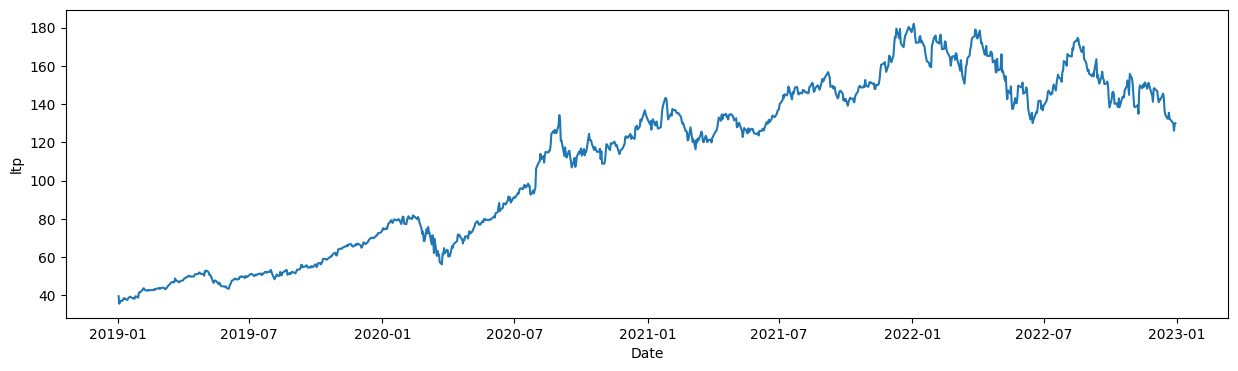

In [117]:
plt.figure(figsize=(15,4))
plt.plot(df['ds'],df['y'])
plt.xlabel('Date')
plt.ylabel('ltp')
plt.show()


In [118]:
df.shape

(1008, 2)

In [119]:
train_size=int(len(df)*0.8)
train,test=df[:train_size],df[train_size:]

In [120]:
train.shape

(806, 2)

In [121]:
test.shape

(202, 2)

In [122]:
train.tail()

,ds,y
Date,,
2022-03-08,2022-03-08,157.440002
2022-03-09,2022-03-09,162.949997
2022-03-10,2022-03-10,158.520004
2022-03-11,2022-03-11,154.729996
2022-03-14,2022-03-14,150.619995


In [123]:
train.head()

,ds,y
Date,,
2019-01-02,2019-01-02,39.480000
2019-01-03,2019-01-03,35.547501
2019-01-04,2019-01-04,37.064999
2019-01-07,2019-01-07,36.982498
2019-01-08,2019-01-08,37.687500


In [124]:
model=Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
model.fit(train)

19:08:51 - cmdstanpy - INFO - Chain [1] start processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
future=model.make_future_dataframe(periods=len(test),freq='D')

In [126]:
forecast=model.predict(future)

In [127]:
forecast[['yhat','yhat_upper','yhat_lower']]

,yhat,yhat_upper,yhat_lower
0,37.921014,42.804284,33.118495
1,37.742506,42.451142,32.916379
2,37.716275,42.497318,32.669570
3,37.788923,42.779416,33.114323
4,38.027446,42.926199,33.069156
...,...,...,...
1003,179.959508,197.731425,164.167286
1004,179.817093,198.409574,163.443016
1005,179.902960,198.024782,163.953269
1006,182.260878,199.998486,166.405481


c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


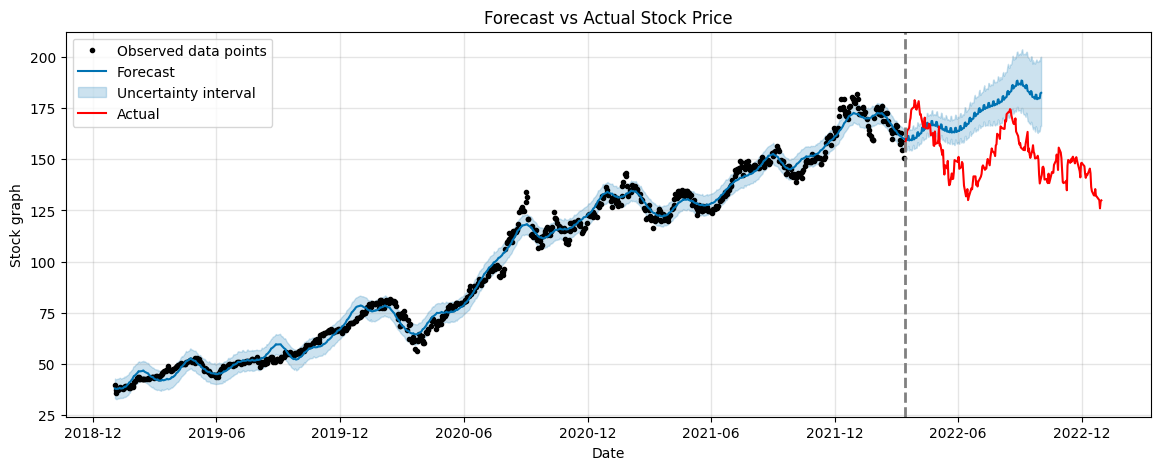

In [128]:
fig,ax=plt.subplots(figsize=(14,5))
model.plot(forecast,ax=ax,xlabel='Date',ylabel='Stock graph',plot_cap=False,uncertainty=True)
ax.plot(test.index,test['y'],label='Actual',color='red')
ax.set_title('Forecast vs Actual Stock Price')
ax.axvline(test.index[0],color='grey',linestyle='--',lw=2)
plt.legend()
plt.show()